In [ ]:
# 이미지 시각화 라이브러리
import cv2 
import matplotlib.pyplot as plt

# 텐서플로우
import tensorflow_datasets.public_api as tfds
import tensorflow as tf

In [ ]:
# tfds 라는 라이브러리로부터 food101 라는 데이터를 가지고 오며, with_info = True : 데이터의 정보도 가지고 온다.
data_train, ds_info = tfds.load('food101', split=[tfds.Split.TRAIN], with_info = True)
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete8UJZMA/food101-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete8UJZMA/food101-validation.tfrecord*...:   0%|         …

Dataset food101 downloaded and prepared to ~/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_path='~/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo

In [ ]:
# 인공지능 모델 : resnet50
# 텐서풀로우로부터 resnet50을 불러와  weights 파라미터에 imagent 을 넣어주면 학습된 인공지능의 가중치를 가지고 올 수 있다.
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224,224,3))
resnet50_pre.summary()

102981632/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [ ]:
# 이미지를 예측하는 함수를 만든다.
def pred_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_resized = cv2.resize(img, (224,224))
  pred = resnet50_pre.predict(img_resized.reshape([1,224,224,3]))
  decoded_pred = decode_predictions(pred)

  for i, instance in enumerate(decoded_pred[0]):
    print('{}.{} ({:.2f}%)'.format(i+1, instance[1], instance[2] * 100))

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# 폴더에 있는 이미지 파일명을 리스트 형태로 받는다.
path = '/content/drive/MyDrive/슬플 때 먹으면 좋은 음식'
os.chdir(path) 
files = os.listdir(path)

In [ ]:
files

['1.wvh2rkectez52upyf5wgi4itri.jpg',
 '2.jqqpjsotwib7ademb4njbn4wk4.jpg',
 '3.1.jpg',
 '4.eating-796489_640.jpg']

In [ ]:
# 폴더에 있는 .jpg 파일을 불러온다.
jpg_img = []
for file in files:
    if '.jpg' in file: 
        f = cv2.imread(file)
        g = cv2.cvtColor(f, cv2.COLOR_BGR2RGB)
        jpg_img.append(g)

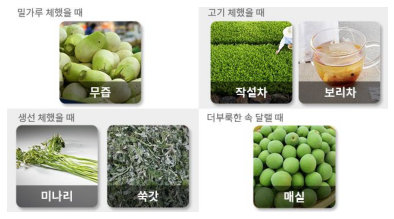

49152/35363 [=========================================] - 0s 0us/step
1.web_site (73.06%)
2.remote_control (16.89%)
3.lighter (5.58%)
4.corn (0.64%)
5.pill_bottle (0.60%)


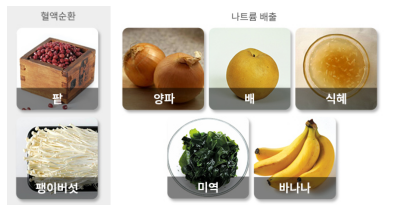

1.web_site (86.22%)
2.remote_control (9.18%)
3.water_bottle (1.03%)
4.iron (0.50%)
5.loudspeaker (0.42%)


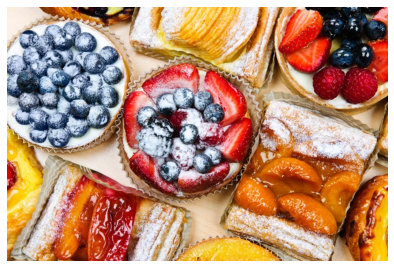

1.breastplate (39.79%)
2.shield (19.26%)
3.buckle (7.98%)
4.spotlight (3.20%)
5.hair_slide (1.87%)


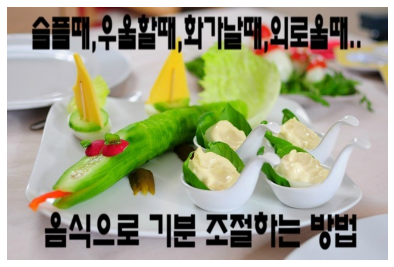

1.candle (15.60%)
2.carton (11.67%)
3.hand_blower (7.50%)
4.web_site (5.37%)
5.toilet_seat (5.31%)


In [ ]:
for i in range(4):
    plt.figure(figsize=(15,12))

    plt.subplot(2, 2, i+1)
    pred_img(jpg_img[i])

plt.show()